In [2]:
from Bio.PDB.PDBList import PDBList
from Bio.PDB.PDBParser import PDBParser

In [3]:
pdb_list = PDBList()
pdb_list.download_pdb_files(pdb_codes=["1ubq"],pdir=".",file_format="pdb")

In [4]:
p = PDBParser()
structure = p.get_structure("X", "pdb1ubq.ent")
ca_list = []
for model in structure:
    for chain in model:
        for residue in chain:
            for atom in residue:
                if atom.get_name() == "CA":
                    ca_list.append(atom)

In [5]:
from Bio.PDB.vectors import calc_angle, calc_dihedral
distances = []
for i in range(len(ca_list)-1):
    distance = ca_list[i] - ca_list[i+1]
    distances.append(distance)

bond_angles = []
for i in range(len(ca_list)-2):
    vector1 = ca_list[i].get_vector()
    vector2 = ca_list[i+1].get_vector()
    vector3 = ca_list[i+2].get_vector()
    bond_angle = calc_angle(vector1, vector2, vector3)
    bond_angles.append(bond_angle)

dihedral_angles = []
for i in range(len(ca_list)-3):
    vector1 = ca_list[i].get_vector()
    vector2 = ca_list[i+1].get_vector()
    vector3 = ca_list[i+2].get_vector()
    vector4 = ca_list[i+3].get_vector()
    dihedral_angle = calc_dihedral(vector1, vector2, vector3,vector4)
    dihedral_angles.append(dihedral_angle)

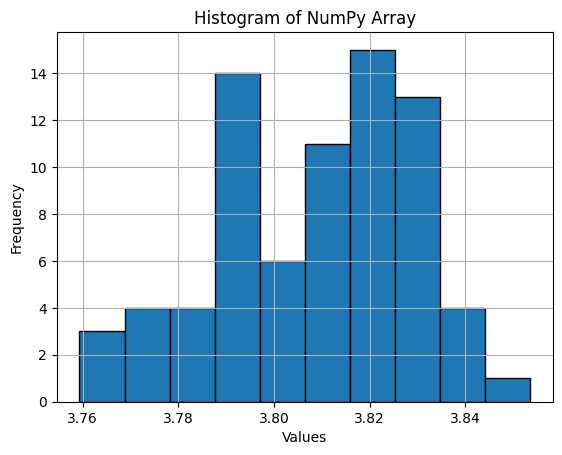

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# Plot the histogram
plt.hist(distances, bins=10, edgecolor='black')  
plt.title('Histogram of NumPy Array')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
